In [96]:
import pandas as pd 
import seaborn as sns
import matplotlib as plt
import numpy as np

divorce = pd.read_csv("divorce.csv", parse_dates =["marriage_date"])
divorce.dtypes

divorce_date                 object
dob_man                      object
education_man                object
income_man                  float64
dob_woman                    object
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object

In [97]:
divorce["marriage_month"] = divorce["marriage_date"].dt.month
divorce.head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids,marriage_month
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0,6
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN,9
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0,2
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN,5
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN,8


In [98]:
divorce = pd.read_csv('divorce_one.csv')
divorce["marriage_date"] = pd.to_datetime(divorce["marriage_date"])
divorce.dtypes

num_kids                    float64
day                           int64
month                         int64
year                          int64
marriage_date        datetime64[ns]
marriage_duration             int64
dtype: object

In [99]:
divorce["marriage_month"] = divorce["marriage_date"].dt.month
divorce.head()

,num_kids,day,month,year,marriage_date,marriage_duration,marriage_month
0,1.0,26,6,2000,2000-06-26,5,6
1,NaN,2,9,2001,2001-09-02,7,9
2,2.0,2,2,2000,2000-02-02,2,2
3,NaN,13,5,2006,2006-05-13,2,5
4,NaN,6,8,2007,2007-08-06,3,8


<Axes: xlabel='marriage_month', ylabel='marriage_duration'>

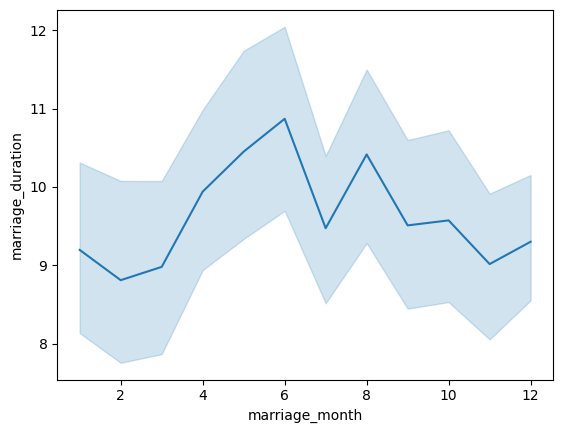

In [100]:
sns.lineplot(data=divorce , x="marriage_month", y="marriage_duration")

In [101]:
divorce.corr(numeric_only = True)

,num_kids,day,month,year,marriage_duration,marriage_month
num_kids,1.000000,0.019353,-0.000551,-0.461495,0.447358,-0.000551
day,0.019353,1.000000,-0.013650,-0.041520,0.015322,-0.013650
month,-0.000551,-0.013650,1.000000,-0.011456,0.001433,1.000000
year,-0.461495,-0.041520,-0.011456,1.000000,-0.812469,-0.011456
marriage_duration,0.447358,0.015322,0.001433,-0.812469,1.000000,0.001433
marriage_month,-0.000551,-0.013650,1.000000,-0.011456,0.001433,1.000000


<Axes: >

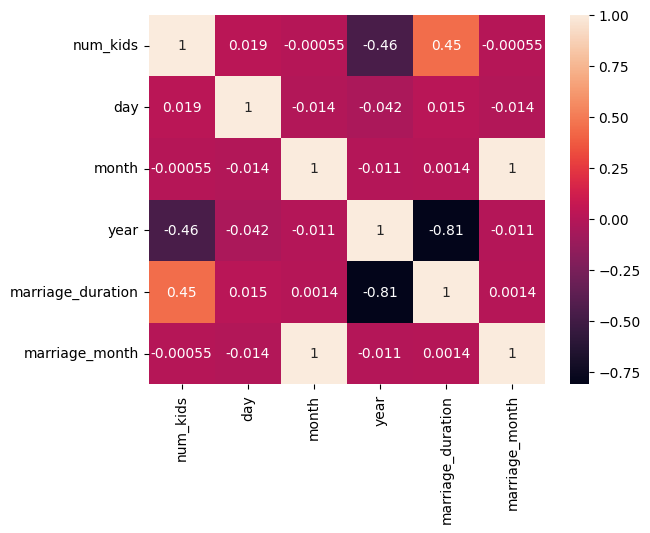

In [102]:
sns.heatmap(divorce.corr(numeric_only = True),annot=True)

<Axes: xlabel='income_man', ylabel='income_woman'>

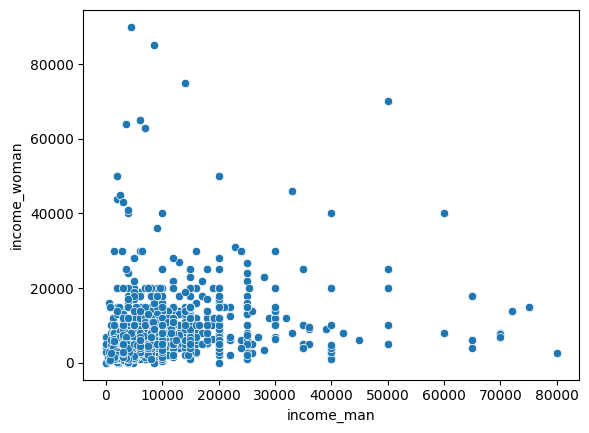

In [103]:
# Reload the full divorce dataset with all columns
divorce = pd.read_csv("divorce.csv", parse_dates=["marriage_date", "divorce_date", "dob_man", "dob_woman"])
divorce["marriage_month"] = divorce["marriage_date"].dt.month

sns.scatterplot(data = divorce, x = "income_man", y = "income_woman")

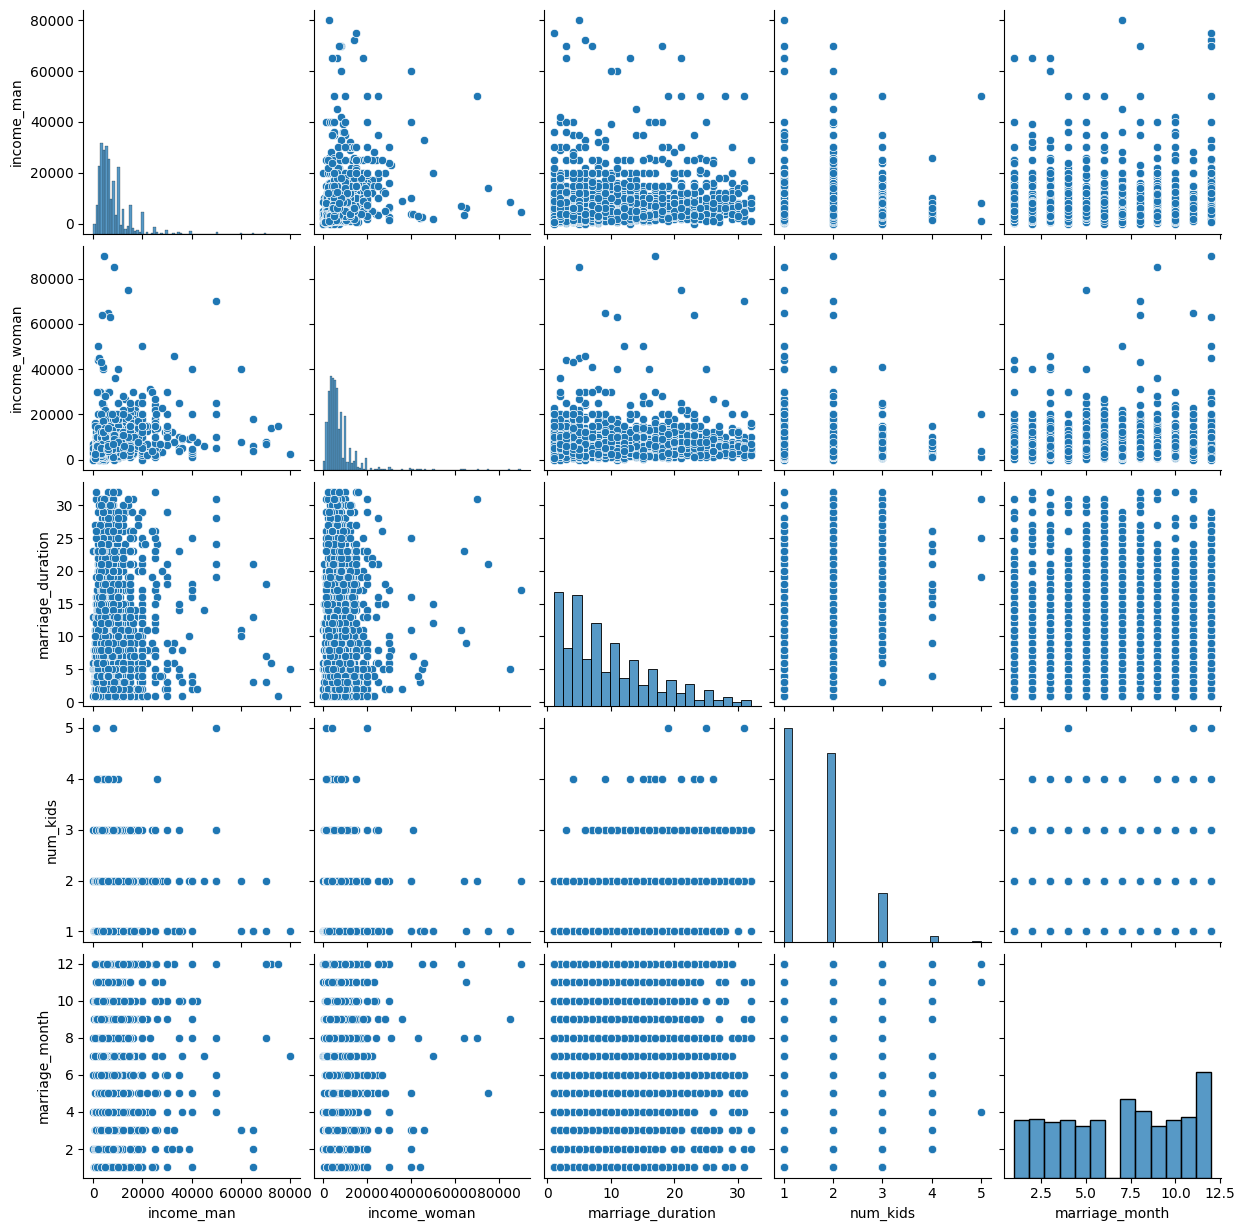

In [104]:
sns.pairplot(data = divorce)

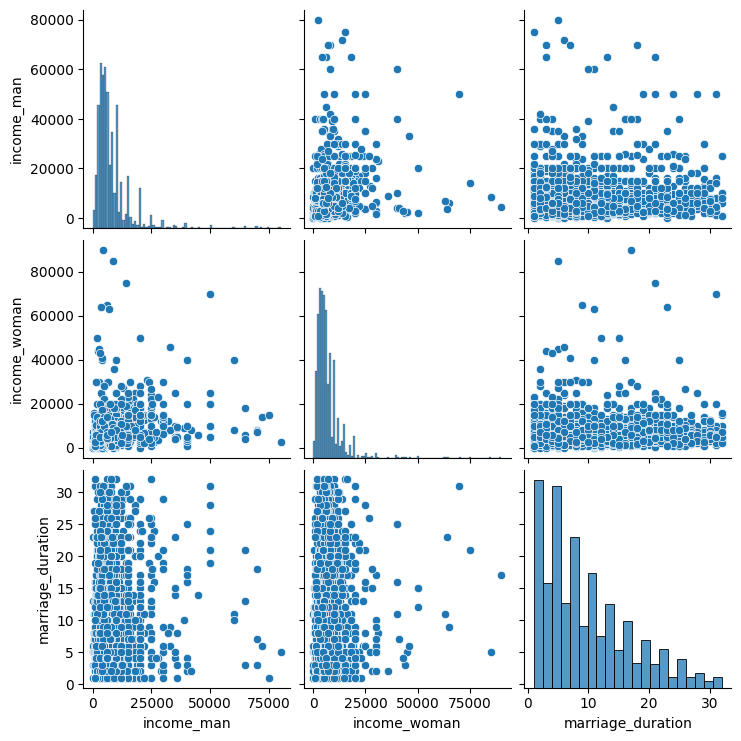

In [105]:
sns.pairplot(data=divorce, vars=["income_man","income_woman","marriage_duration"])

In [106]:
divorce['education_man'].value_counts()

education_man
Professional    1313
Preparatory      501
Secondary        288
Primary          100
Other              3
Name: count, dtype: int64

<Axes: xlabel='marriage_duration', ylabel='Count'>

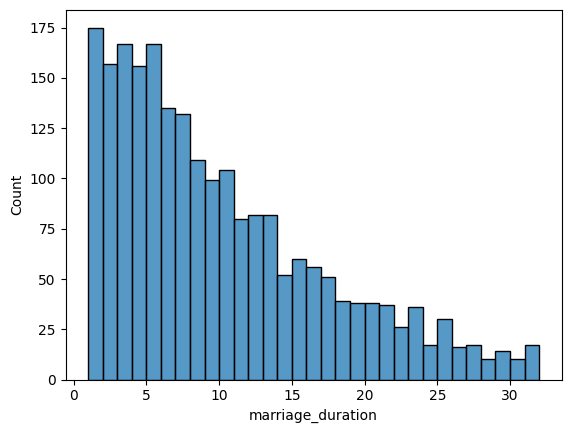

In [107]:
sns.histplot(data=divorce, x='marriage_duration', binwidth = 1)

<Axes: xlabel='marriage_duration', ylabel='Count'>

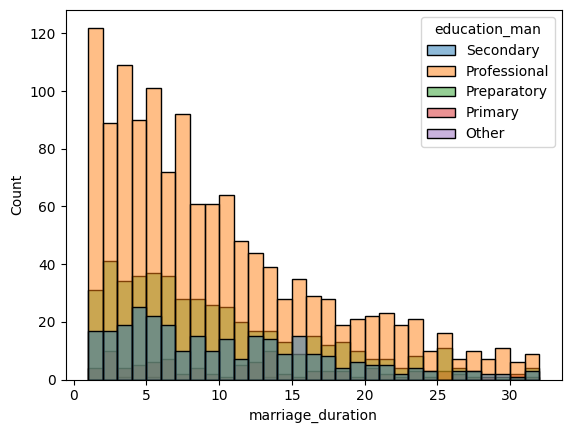

In [108]:
sns.histplot(data=divorce, x='marriage_duration', hue = 'education_man', binwidth = 1)

<Axes: xlabel='marriage_duration', ylabel='Density'>

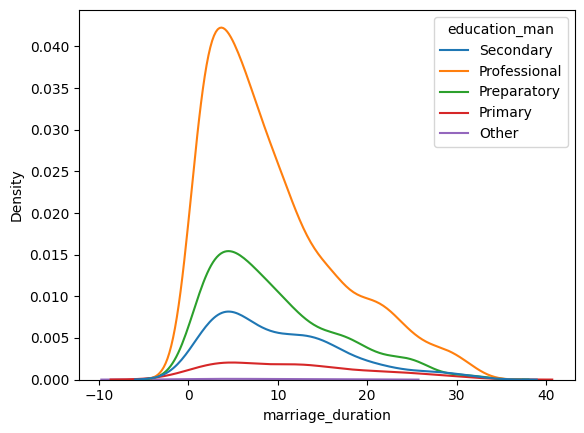

In [109]:
sns.kdeplot(data=divorce, x='marriage_duration', hue = 'education_man')

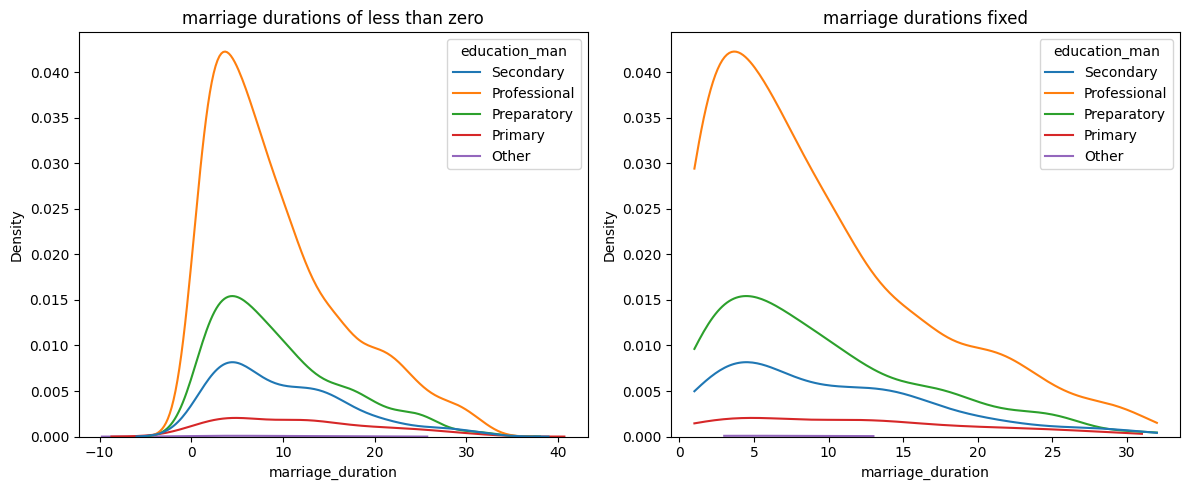

In [110]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.kdeplot(data=divorce, x='marriage_duration', hue = 'education_man', ax=axes[0])
axes[0].set_title("marriage durations of less than zero")
sns.kdeplot(data=divorce, x=divorce['marriage_duration'], hue = divorce['education_man'], cut = 0,  ax=axes[1])
axes[1].set_title("marriage durations fixed")
plt.tight_layout()
plt.show()


In [111]:
divorce['marriage_year'] = divorce['marriage_date'].dt.year
divorce['man_age_marriage'] = divorce['marriage_year'] - divorce['dob_man'].dt.year
divorce['woman_age_marriage'] = divorce['marriage_year'] - divorce['dob_woman'].dt.year



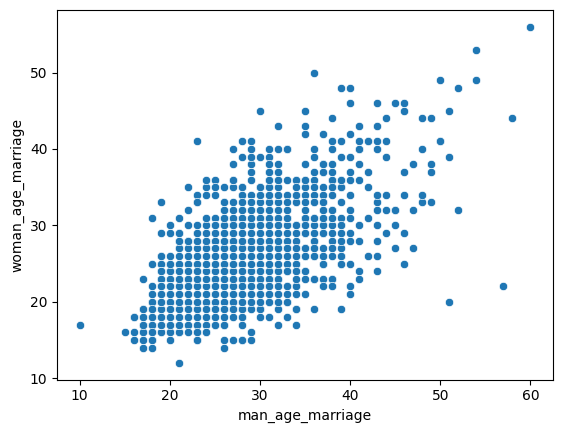

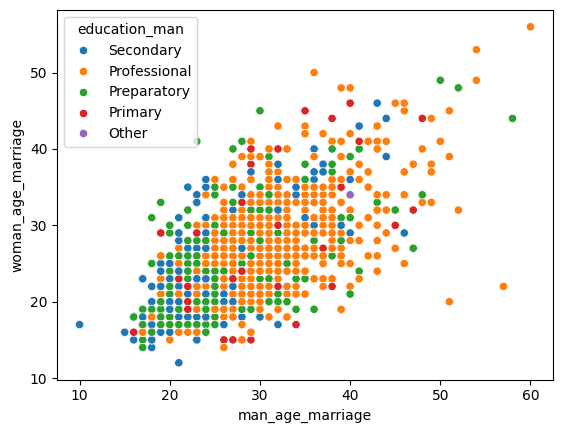

In [112]:
sns.scatterplot(data=divorce, x ='man_age_marriage', y = 'woman_age_marriage')
plt.show()
sns.scatterplot(data=divorce, x ='man_age_marriage', y = 'woman_age_marriage', hue = 'education_man')
plt.show()

In [113]:
planes = pd.read_csv("Airlines_unclean.csv", index_col=0)
planes["Destination"].value_counts()

Destination
Cochin       4391
Banglore     2773
Delhi        1219
New Delhi     888
Hyderabad     673
Kolkata       369
Name: count, dtype: int64

In [114]:
planes["Destination"].value_counts(normalize=True)

Destination
Cochin       0.425773
Banglore     0.268884
Delhi        0.118200
New Delhi    0.086105
Hyderabad    0.065257
Kolkata      0.035780
Name: proportion, dtype: float64

In [115]:
pd.crosstab(planes["Source"],planes["Destination"])

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,0,0,1199,0,0,868
Chennai,0,0,0,0,364,0
Delhi,0,4318,0,0,0,0
Kolkata,2720,0,0,0,0,0
Mumbai,0,0,0,662,0,0


In [116]:
planes.groupby(['Source','Destination']).median(numeric_only = True)

Price
Source   Destination         
Banglore Delhi         4823.0
         New Delhi    10976.5
Chennai  Kolkata       3850.0
Delhi    Cochin       10262.0
Kolkata  Banglore      9345.0
Mumbai   Hyderabad     3342.0

In [117]:
pd.crosstab(planes['Source'], planes['Destination'], values=planes['Price'], aggfunc = 'median')

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,NaN,NaN,4823.0,NaN,NaN,10976.5
Chennai,NaN,NaN,NaN,NaN,3850.0,NaN
Delhi,NaN,10262.0,NaN,NaN,NaN,NaN
Kolkata,9345.0,NaN,NaN,NaN,NaN,NaN
Mumbai,NaN,NaN,NaN,3342.0,NaN,NaN


In [118]:
planes.groupby(['Source','Destination']).median(numeric_only = True)

Price
Source   Destination         
Banglore Delhi         4823.0
         New Delhi    10976.5
Chennai  Kolkata       3850.0
Delhi    Cochin       10262.0
Kolkata  Banglore      9345.0
Mumbai   Hyderabad     3342.0

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                  float64
Total_Stops                object
Additional_Info            object
Price                     float64
dtype: object


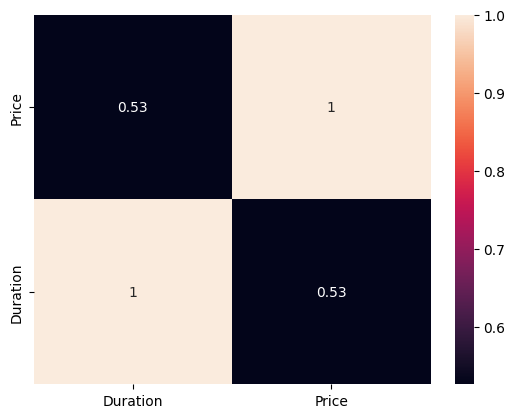

In [119]:
planes = pd.read_csv('Airlines_unclean.csv', index_col = 0, parse_dates=['Date_of_Journey','Dep_Time','Arrival_Time'],date_format = "%d/%m/%Y")
planes["Duration"] = planes["Duration"].str.replace("h", ".")
planes["Duration"] = planes["Duration"].str.replace("m", "")
planes["Duration"] = planes["Duration"].str.replace(" ", "")
planes["Duration"] = planes["Duration"].astype(float)
print(planes.dtypes)
ax = sns.heatmap(planes.corr(numeric_only = True), annot=True)
ax.set_ylim([0,2])
plt.show()

In [120]:
threshold = len(planes) * 0.05
print(threshold)
print(planes.isna().sum())
threshold = len(planes) * 0.05
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]

planes.dropna(subset=cols_to_drop, inplace=True)
print(planes.isna().sum())
airline_prices = planes.groupby("Airline")["Price"].median()
print(airline_prices)
print('============================================')
prices_dict = airline_prices.to_dict()
print(prices_dict)
print('============================================')
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(prices_dict))
print(planes.isna().sum())

533.0
Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64
Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64
Airline
Air Asia              5192.0
Air India             9443.0
GoAir                 5003.5
IndiGo                5054.0
Jet Airways          11507.0
Multiple carriers    10197.0
SpiceJet              3873.0
Vistara               8028.0
Name: Price, dtype: float64
{'Air Asia': 5192.0, 'Air India': 9443.0, 'GoAir': 5003.5, 'IndiGo': 5054.0, 'Jet Airways': 11507.0, 'Multiple carriers': 10197.0, 'SpiceJet': 3873.0, 'Vistara': 8028.0}
Airline              0
D

In [121]:
planes["Total_Stops"].value_counts()

Total_Stops
1 stop      4467
non-stop    2786
2 stops     1219
3 stops       35
4 stops        1
Name: count, dtype: int64

In [122]:
planes['Total_Stops'] = planes['Total_Stops'].str.replace(' stops', '')
planes['Total_Stops'] = planes['Total_Stops'].str.replace(' stop', '')
planes['Total_Stops'] = planes['Total_Stops'].str.replace('non-stop', '0')
planes['Total_Stops'] = planes['Total_Stops'].str.replace(' ', '')
planes['Total_Stops'] = planes['Total_Stops'].astype(int)
print(planes['Total_Stops'].head())
print(planes.dtypes)

0    2
1    1
2    1
3    0
4    1
Name: Total_Stops, dtype: int64
Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                  float64
Total_Stops                 int64
Additional_Info            object
Price                     float64
dtype: object


In [123]:
planes["Total_Stops"].value_counts()

Total_Stops
1    4467
0    2786
2    1219
3      35
4       1
Name: count, dtype: int64

<Axes: >

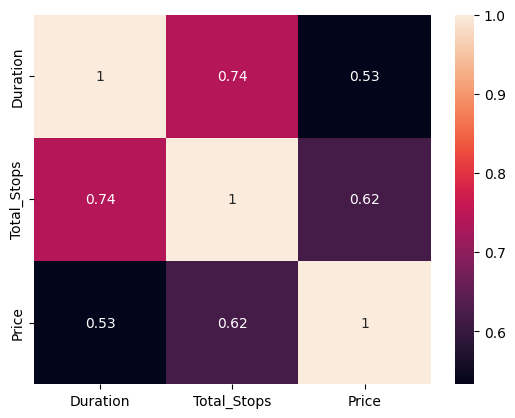

In [124]:
sns.heatmap(planes[["Duration","Total_Stops","Price"]].corr() ,annot=True)

In [125]:
planes['month'] = planes['Date_of_Journey'].dt.month
planes['weekday'] = planes['Date_of_Journey'].dt.weekday
planes['Dep_Time'] = pd.to_datetime(planes['Dep_Time'], format='mixed')
planes['Arrival_Time'] = pd.to_datetime(planes['Arrival_Time'], format='mixed')
print(planes.dtypes)
print(planes[['month', 'weekday', 'Date_of_Journey']].head())

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                  float64
Total_Stops                 int64
Additional_Info            object
Price                     float64
month                       int32
weekday                     int32
dtype: object
   month  weekday Date_of_Journey
0      6        6      2019-06-09
1      5        6      2019-05-12
2      3        4      2019-03-01
3      6        0      2019-06-24
4      3        1      2019-03-12


<Axes: >

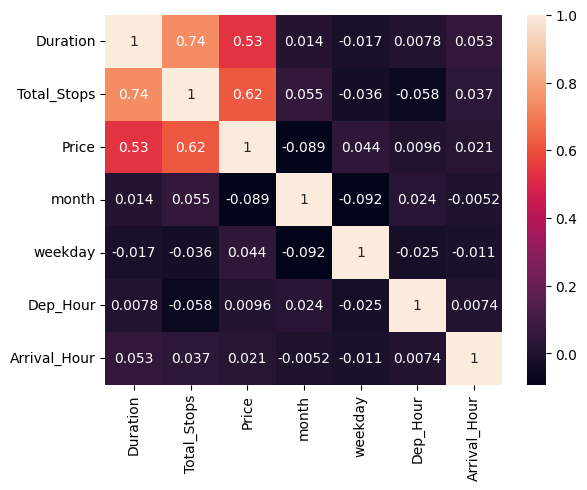

In [126]:
planes['Dep_Hour'] = planes['Dep_Time'].dt.hour
planes['Arrival_Hour'] = planes['Arrival_Time'].dt.hour
sns.heatmap(planes.corr(numeric_only = True), annot = True)

In [127]:
planes["Price"].describe()

count     8508.000000
mean      9033.468441
std       4366.382574
min       1759.000000
25%       5228.000000
50%       8452.000000
75%      12242.000000
max      54826.000000
Name: Price, dtype: float64

In [128]:
twenty_fifth = planes['Price'].quantile(0.25)
median = planes['Price'].median()
seventy_fifth = planes['Price'].quantile(0.75)
maximum = planes['Price'].max()
labels = ['Economy','Premium Economy','Business Class','First Class']
bins = [0, twenty_fifth, median, seventy_fifth, maximum]


In [129]:
planes['Price_Category'] = pd.cut(planes['Price'], labels=labels,bins=bins)
print(planes[['Price', 'Price_Category']].head(10))

     Price   Price_Category
0  13882.0      First Class
1   6218.0  Premium Economy
2  13302.0      First Class
3   3873.0          Economy
4  11087.0   Business Class
5  22270.0      First Class
6  11087.0   Business Class
7   8625.0   Business Class
8   8907.0   Business Class
9   4174.0          Economy


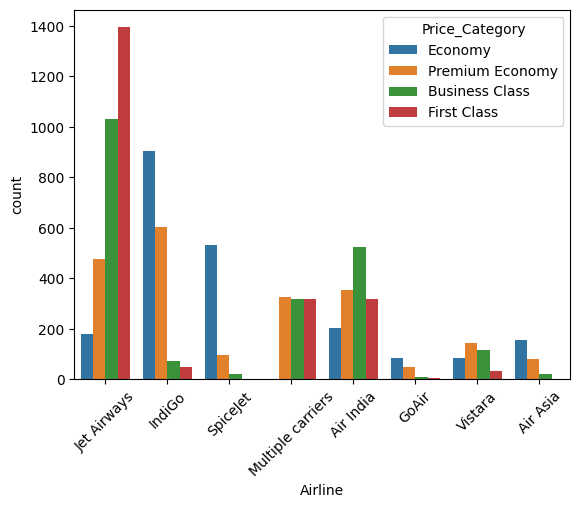

In [130]:
sns.countplot(data=planes, x='Airline', hue='Price_Category')
plt.xticks(rotation = 45)
plt.show()

<div style="background-color: #AAFF00; padding: 15px; border-radius: 10px;">
<h2 style="margin-top:0;">Assignments</h2></div>


In [131]:
#Slide 8

divorce = pd.read_csv('divorce.csv', parse_dates=['divorce_date','dob_man','dob_woman'])
print(divorce.dtypes)

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date                object
marriage_duration           float64
num_kids                    float64
dtype: object


#Slide 8
Question: Which of the columns in the divorce DataFrame has not been updated to a DateTime daya type should be?

Answer: Marriage_date

In [132]:
#Slide 8

divorce["marriage_date"] = pd.to_datetime(divorce['marriage_date'])
print(divorce.dtypes)

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object


In [133]:
#Slide 8

divorce['marriage_year'] = divorce['marriage_date'].dt.year
print(divorce['marriage_year'].head())

0    2000
1    2001
2    2000
3    2006
4    2007
Name: marriage_year, dtype: int32


In [134]:
#Slide 8
print(divorce['marriage_year'].value_counts().sort_index().head(100))

marriage_year
1970      1
1971      1
1972      2
1973      2
1974      6
1975     10
1976      6
1977     11
1978     22
1979     19
1980     23
1981     29
1982     31
1983     26
1984     25
1985     43
1986     51
1987     41
1988     41
1989     59
1990     81
1991     64
1992     68
1993     87
1994     94
1995     87
1996     90
1997    104
1998    121
1999     83
2000    114
2001     97
2002     96
2003     82
2004     79
2005     82
2006     69
2007     68
2008     59
2009     43
2010     38
2011     27
2012     22
2013      4
2014      1
Name: count, dtype: int64


<Axes: xlabel='marriage_year', ylabel='num_kids'>

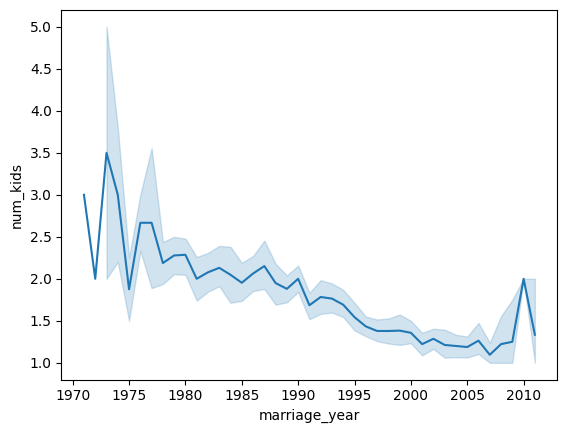

In [135]:
#Slide 8
sns.lineplot(data=divorce, x='marriage_year', y='num_kids')

<Axes: >

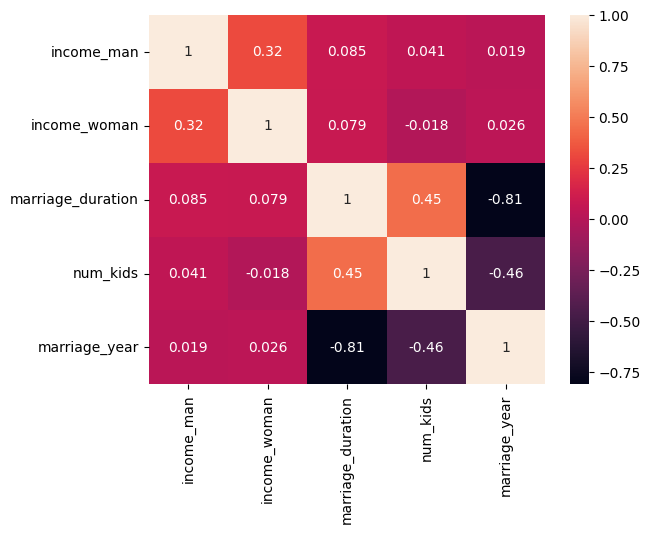

In [136]:
#Slide - 15
sns.heatmap(divorce.corr(numeric_only = True),annot=True)

#Slide - 15
1. False
2. 0.041 - 0.45, 0.45 is closer to 1, thus it means that num_kids and marriage duarion has a stronger correlation
3. -0.46 true because correlation is negative
4. true because correlation is negative 

divorce_date           0
dob_man                0
education_man          4
income_man             0
dob_woman              0
education_woman        0
income_woman           0
marriage_date          0
marriage_duration      0
num_kids             876
marriage_year          0
dtype: int64
divorce_date           0
dob_man                0
education_man          4
income_man             0
dob_woman              0
education_woman        0
income_woman           0
marriage_date          0
marriage_duration      0
num_kids             876
marriage_year          0
num_kids_temp          0
dtype: int64


<Axes: xlabel='marriage_duration', ylabel='num_kids_temp'>

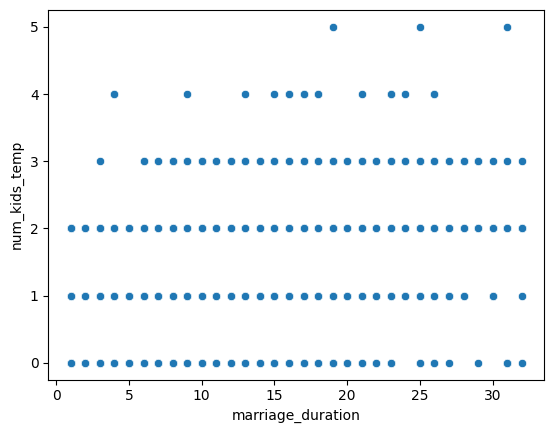

In [137]:
#Slide - 16 

print(divorce.isna().sum())
divorce['num_kids_temp'] = divorce['num_kids'].fillna(0)
print(divorce.isna().sum())
sns.scatterplot(data=divorce, x='marriage_duration', y='num_kids_temp')

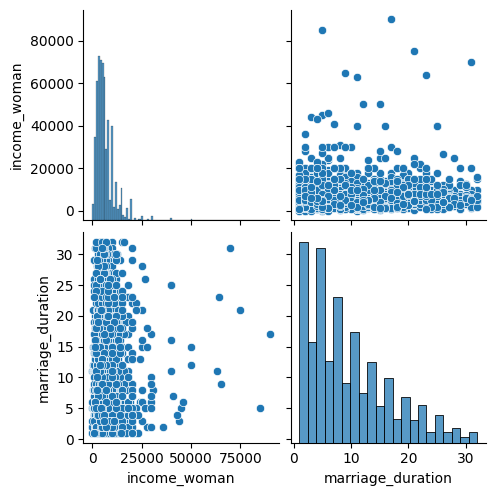

In [138]:
#Slide 16
sns.pairplot(data=divorce, vars = ['income_woman', 'marriage_duration'])

<Axes: xlabel='woman_age_marriage', ylabel='income_woman'>

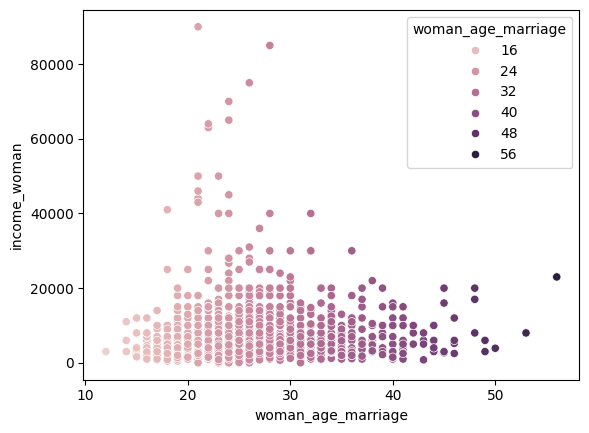

In [157]:
#Slide - 25 
divorce['marriage_year'] = divorce['marriage_date'].dt.year
divorce['woman_age_marriage'] = divorce['marriage_year'] - divorce['dob_woman'].dt.year

sns.scatterplot(data=divorce, x='woman_age_marriage', y='income_woman', hue = 'woman_age_marriage')

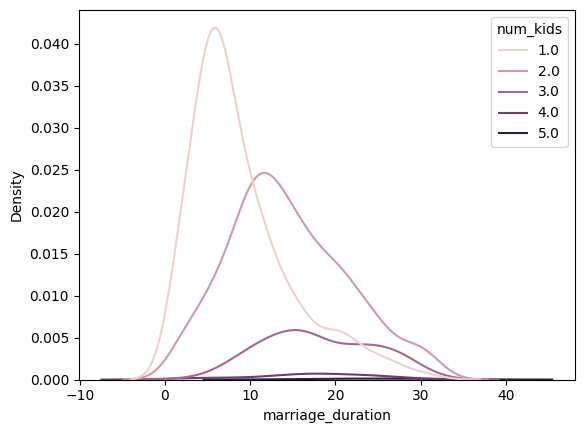

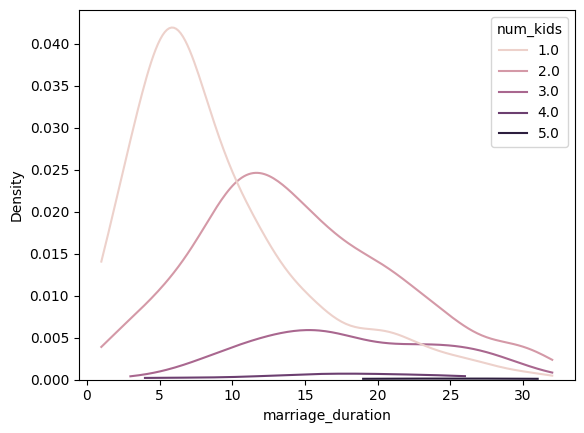

In [140]:
#Slide 25
sns.kdeplot(data=divorce, x='marriage_duration', hue = 'num_kids')
plt.show()
sns.kdeplot(data=divorce, x='marriage_duration', hue = 'num_kids', cut = 0)
plt.show()

In [141]:
#Slide - 34
salaries = pd.read_csv('Salary_Rupee_USD.csv', index_col = 0)
print(salaries.info())
print("----------------------")
print(salaries['Job_Category'].value_counts(normalize = True))

<class 'pandas.core.frame.DataFrame'>
Index: 407 entries, 0 to 406
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Working_Year          407 non-null    int64  
 1   Designation           407 non-null    object 
 2   Experience            407 non-null    object 
 3   Employment_Status     407 non-null    object 
 4   Salary_In_Rupees      407 non-null    float64
 5   Employee_Location     407 non-null    object 
 6   Company_Location      407 non-null    object 
 7   Company_Size          407 non-null    object 
 8   Remote_Working_Ratio  407 non-null    int64  
 9   Salary_USD            407 non-null    float64
 10  Job_Category          407 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 38.2+ KB
None
----------------------
Job_Category
Data Science        0.277641
Data Engineering    0.272727
Data Analytics      0.226044
Machine Learning    0.120393
Other            

In [142]:
#Slide - 35
print(pd.crosstab(salaries["Company_Size"], salaries["Experience"]))

Experience    EN  EX  MI   SE
Company_Size                 
L             24   7  49   44
M             25   9  58  136
S             18   1  21   15


In [143]:
#Slide - 35
print(pd.crosstab(salaries["Job_Category"], salaries["Company_Size"]))

Company_Size       L   M   S
Job_Category                
Data Analytics    23  61   8
Data Engineering  28  72  11
Data Science      38  59  16
Machine Learning  17  19  13
Managerial         5   8   1
Other             13   9   6


In [144]:
#Slide - 35

print(pd.crosstab(salaries["Job_Category"], salaries["Company_Size"], values=salaries["Salary_USD"], aggfunc="mean"))

Company_Size                  L              M             S
Job_Category                                                
Data Analytics    112851.749217   95912.685246  53741.877000
Data Engineering  118939.035000  121287.060500  86927.136000
Data Science       96489.520105  116044.455864  62241.749250
Machine Learning  140779.491529  100794.236842  78812.586462
Managerial        190551.448800  150713.628000  31484.700000
Other              92873.911385   89750.578667  69871.248000


In [145]:
#Slide - 48

salaries = pd.read_csv('Salaries_with_date_of_response.csv', index_col = 0, parse_dates=['date_of_response'],date_format = "%d/%m/%Y")
print(salaries.dtypes)
print(salaries.head())

Designation                     object
date_of_response        datetime64[ns]
Experience                      object
Employment_Status               object
Salary_In_Rupees               float64
Employee_Location               object
Company_Location                object
Company_Size                    object
Remote_Working_Ratio             int64
Salary_USD                     float64
Job_Category                    object
dtype: object
                  Designation date_of_response Experience Employment_Status  \
0  Machine Learning Scientist       2020-01-07         SE                FT   
1           Big Data Engineer       2020-09-19         SE                FT   
2        Product Data Analyst       2020-11-21         MI                FT   
3   Machine Learning Engineer       2020-11-29         SE                FT   
4                Data Analyst       2020-09-07         EN                FT   

   Salary_In_Rupees Employee_Location Company_Location Company_Size  \
0        20

In [146]:
#Slide 48
salaries["month"] = salaries["date_of_response"].dt.month
salaries["weekday"] = salaries["date_of_response"].dt.weekday

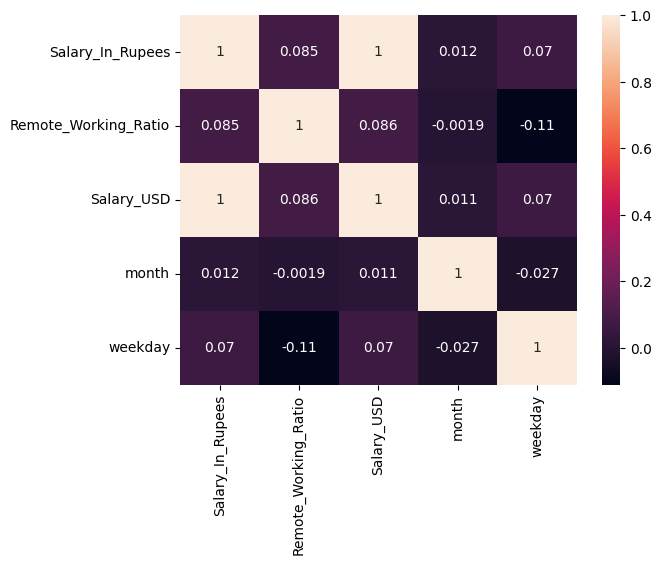

In [147]:
#Slide 48
sns.heatmap(salaries.corr(numeric_only = True), annot=True)
plt.show()

In [148]:
#Slide - 49 

q25 = salaries["Salary_USD"].quantile(0.25)
salaries_median = salaries["Salary_USD"].median()
q75 = seventy_fifth = salaries["Salary_USD"].quantile(0.75)
print(q25, q75, salaries_median)

60880.691999999995 143225.1 97488.552


In [149]:
#Slide - 49

max_salary = salaries['Salary_USD'].max()
print(max_salary)

salary_labels = ["entry", "mid", "senior", "exec"]
salary_ranges = [0, q25, salaries_median, q75, max_salary]

print(salary_ranges)

429675.3
[0, np.float64(60880.691999999995), np.float64(97488.552), np.float64(143225.1), np.float64(429675.3)]


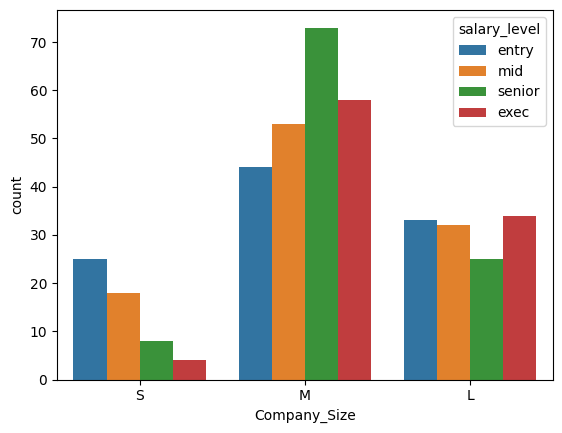

In [150]:
#Slide - 49 
salaries["salary_level"] = pd.cut(salaries["Salary_USD"],
                                  bins=salary_ranges,
                                  labels=salary_labels)
sns.countplot(data=salaries, x="Company_Size", hue="salary_level")
plt.show()

In [151]:
#Slide - 50 
usa_and_gb = salaries[salaries['Employee_Location'].isin(['US', 'GB'])]
print(usa_and_gb['Employee_Location'].value_counts())

Employee_Location
US    228
GB     29
Name: count, dtype: int64


In [152]:
#Slide - 50
print(usa_and_gb.groupby('Employee_Location')['Salary_USD'].mean().round(2))

Employee_Location
GB     77349.49
US    139392.98
Name: Salary_USD, dtype: float64


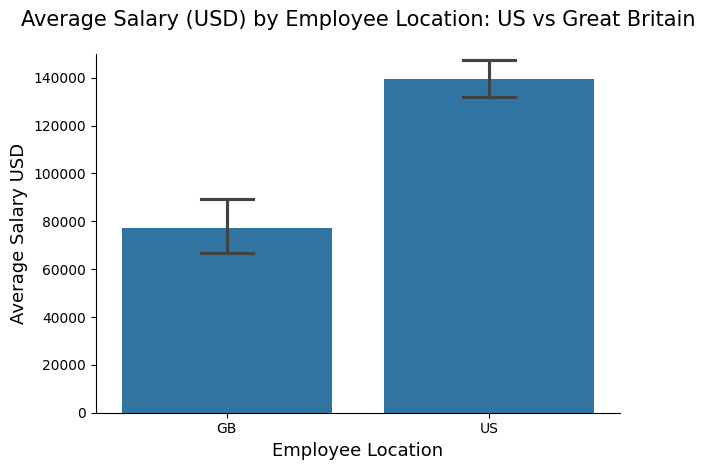

In [153]:
#Slide - 50 
sns.barplot(
    data=usa_and_gb,
    x='Employee_Location',
    y='Salary_USD',
    order=['GB', 'US'],     
    estimator='mean',
    errorbar='ci',            
    capsize=0.2,         
)

plt.title('Average Salary (USD) by Employee Location: US vs Great Britain', fontsize=15, pad=20)
plt.xlabel('Employee Location', fontsize=13)
plt.ylabel('Average Salary USD', fontsize=13)
plt.ylim(0, 150000)
sns.despine(trim=False)
plt.tight_layout()
plt.show()

TypeError: Data source must be a DataFrame or Mapping, not <class 'list'>.